Importando as bibliotecas

In [1]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importando o banco

In [2]:
dados = pd.read_csv("Banco de dados.csv", delimiter=";")

Atribuindo valores numericos aos rotulos

In [3]:
def polaridade(pol):
    if pol == 'Positivo':
        return 1.0
    elif pol == 'Neutro':
        return 0.0
    else:
        return -1.0

Atribuindo ao Dataframe as colunas com os seus repectivos valores

In [4]:
polaridades = [polaridade(dados["Polaridade"][ind]) for ind in dados.index]

In [5]:
dados["Polaridade"] = polaridades

Aplicando a biblioteca TextBlod. As frases de entrada são traduzidas do portugues para o ingles para que o TextBlod execute corretamente

In [6]:
def polaridade_textblob(text):
    frase = TextBlob (text)
    traduz = TextBlob(str(frase.translate(to="en" )))
    return traduz.polarity

In [7]:
polaridades = [polaridade_textblob(dados['Frase'][ind]) for ind in dados.index]

In [8]:
dados['Analise'] = polaridades

Analisando o Dataframe

In [9]:
dados

,Frase,Polaridade,Analise
0,Poderia ter sido melhor devido ao pouco tempo ...,1.0,0.062500
1,Me sai bem na avaliação pois ele desenvolveu o...,1.0,0.100000
2,Foi um desenvolvimento mediano poderia ter um ...,0.0,0.061111
3,Poderia ser melhor pois não me doei o suficien...,0.0,0.250000
4,Tive um desempenho razoavel na avaliação,1.0,0.200000
5,O professor não mostrou uma completa dominio n...,1.0,-0.051667
6,De acordo com o professor eu fui bem,1.0,0.000000
7,Me sinto frustrado com algumas materias por nã...,0.0,-0.700000
8,Ocorreu de maneira satisfatoria,1.0,0.000000
9,Aula bastante prudutiva pois foi abordado dive...,1.0,0.100000


Função para tranformar os numeros flutuantes em numeros inteiros de acordo com o seus valores de polaridade

In [10]:
def predicao(anls):
    if anls < -0.1:
        return -1.0
    elif (anls >= -0.1) and (anls <= 0.1):
        return 0.0
    else:
        return 1.0

Função para comparar o valor do rotulo com o valor da polaridade da frase 

In [11]:
def acuracia(anls, pred):
    if (anls - pred) == 0:
        return 'certo'
    else:
        return 'errado'

Aplicando a função "predicao" na coluna "Analise"

In [12]:
predicao = [predicao(dados['Analise'][ind]) for ind in dados.index]

Atribuindo uma nova coluna com o valor inteiro retornado pela funcão "predicao"

In [13]:
dados["Predicao"] = predicao

Aplicando a funcão de comparação entre as colunas "Nvpolaridade" e "Predicao"

In [14]:
acuracia = [acuracia(dados['Polaridade'][ind], dados['Predicao'][ind]) for ind in dados.index]

In [15]:
dados["Acuracia"] = acuracia

Analisando o Dataframe

In [16]:
dados

,Frase,Polaridade,Analise,Predicao,Acuracia
0,Poderia ter sido melhor devido ao pouco tempo ...,1.0,0.062500,0.0,errado
1,Me sai bem na avaliação pois ele desenvolveu o...,1.0,0.100000,0.0,errado
2,Foi um desenvolvimento mediano poderia ter um ...,0.0,0.061111,0.0,certo
3,Poderia ser melhor pois não me doei o suficien...,0.0,0.250000,1.0,errado
4,Tive um desempenho razoavel na avaliação,1.0,0.200000,1.0,certo
5,O professor não mostrou uma completa dominio n...,1.0,-0.051667,0.0,errado
6,De acordo com o professor eu fui bem,1.0,0.000000,0.0,errado
7,Me sinto frustrado com algumas materias por nã...,0.0,-0.700000,-1.0,errado
8,Ocorreu de maneira satisfatoria,1.0,0.000000,0.0,errado
9,Aula bastante prudutiva pois foi abordado dive...,1.0,0.100000,0.0,errado


Indice de acertos

In [17]:
dados["Acuracia"].value_counts()

certo     25
errado    20
Name: Acuracia, dtype: int64

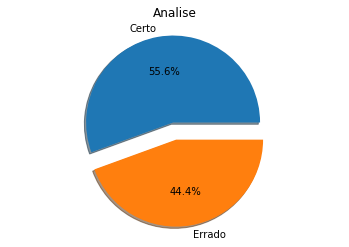

In [18]:
x = dados["Acuracia"].value_counts()
labels_list = ['Certo', 'Errado']
plt.axis('equal')
ex=(0.1,0.1)
plt.pie(x, labels=labels_list, autopct='%1.1f%%', explode=ex, shadow=True)
plt.title('Analise')
plt.show()